In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

In [2]:
server = 'ADRIAN'
database = 'Universal'
username = 'sa'
password = '12345'

conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    conn = pyodbc.connect(conn_str)
    print('Conexión exitosa')
except pyodbc.Error as ex:
    print(f'Error de conexión: {ex}')


Conexión exitosa


Consultamos la tabla PREDICTIVO

In [3]:
try:
    # Conexión
    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # consulta SQL
    sql_query = '''
    SELECT TOP (10) *
      FROM [dbo].[PREDICTIVO]
    '''

   
    cursor.execute(sql_query)

    
    rows = cursor.fetchall()

    
    for row in rows:
        print(row)

    
    cursor.close()
    conn.close()

    print('Consulta exitosa')

except pyodbc.Error as ex:
    print(f'Error de conexión: {ex}')


(2019, 5, '2019-05', 'B2B0130001', 2967.0)
(2019, 6, '2019-06', 'B2B0130001', 3470.0)
(2019, 7, '2019-07', 'B2B0130001', 4786.0)
(2019, 8, '2019-08', 'B2B0130001', 3557.0)
(2019, 9, '2019-09', 'B2B0130001', 5315.0)
(2019, 10, '2019-10', 'B2B0130001', 3335.0)
(2019, 11, '2019-11', 'B2B0130001', 4698.0)
(2019, 12, '2019-12', 'B2B0130001', 5391.0)
(2020, 1, '2020-01', 'B2B0130001', 2879.0)
(2020, 2, '2020-02', 'B2B0130001', 4265.0)
Consulta exitosa


C:\Users\adria\AppData\Local\Temp\ipykernel_21900\3075574390.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


   Anio  MES  AnioMes        PKID  CantidadVentaMes
0  2019    5  2019-05  B2B0130001            2967.0
1  2019    6  2019-06  B2B0130001            3470.0
2  2019    7  2019-07  B2B0130001            4786.0
3  2019    8  2019-08  B2B0130001            3557.0
4  2019    9  2019-09  B2B0130001            5315.0
                Anio            MES  CantidadVentaMes
count  130658.000000  130658.000000     130658.000000
mean     2021.540694       7.052526        349.531579
std         1.383597       3.349523       2243.007861
min      2019.000000       1.000000          0.000000
25%      2020.000000       4.000000          6.000000
50%      2022.000000       7.000000         27.000000
75%      2023.000000      10.000000        140.000000
max      2024.000000      12.000000     433307.000000


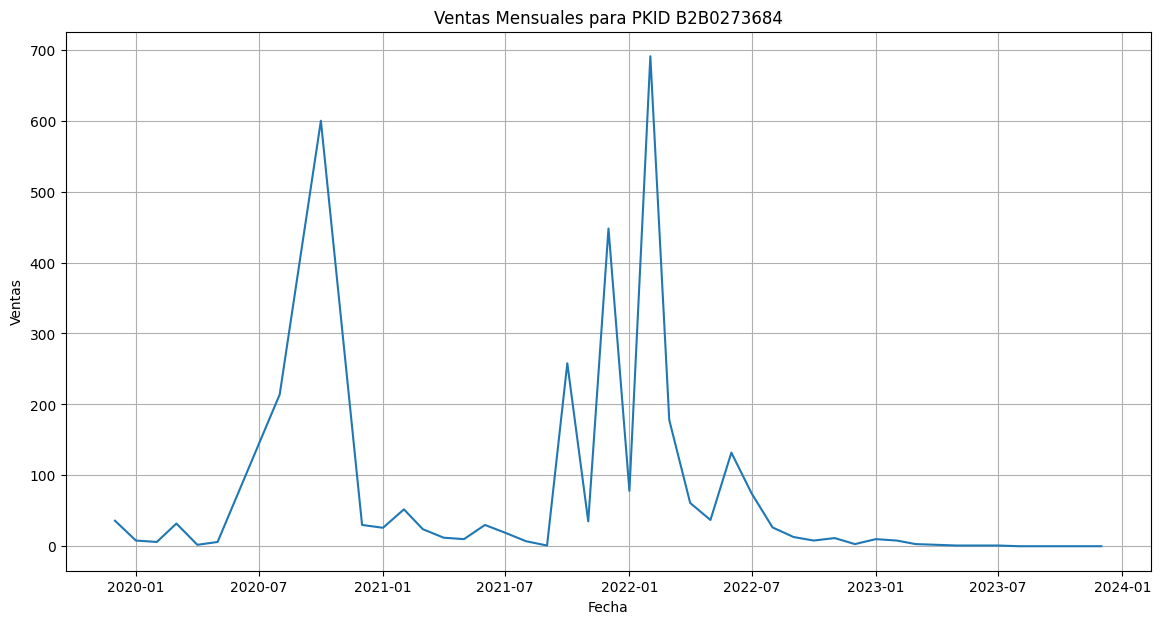

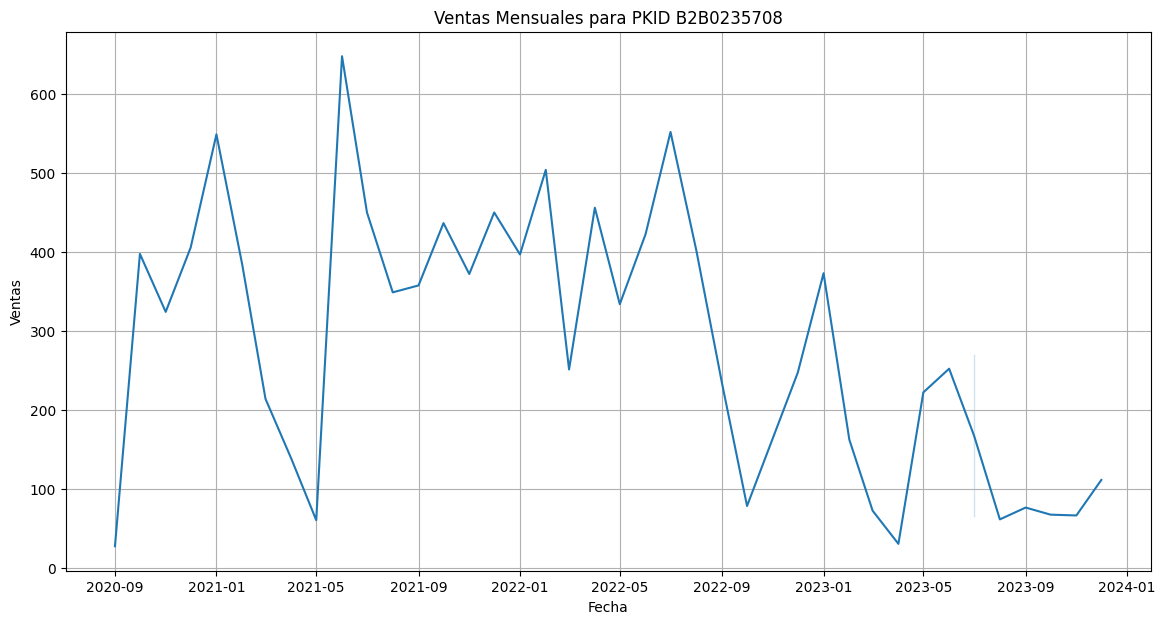

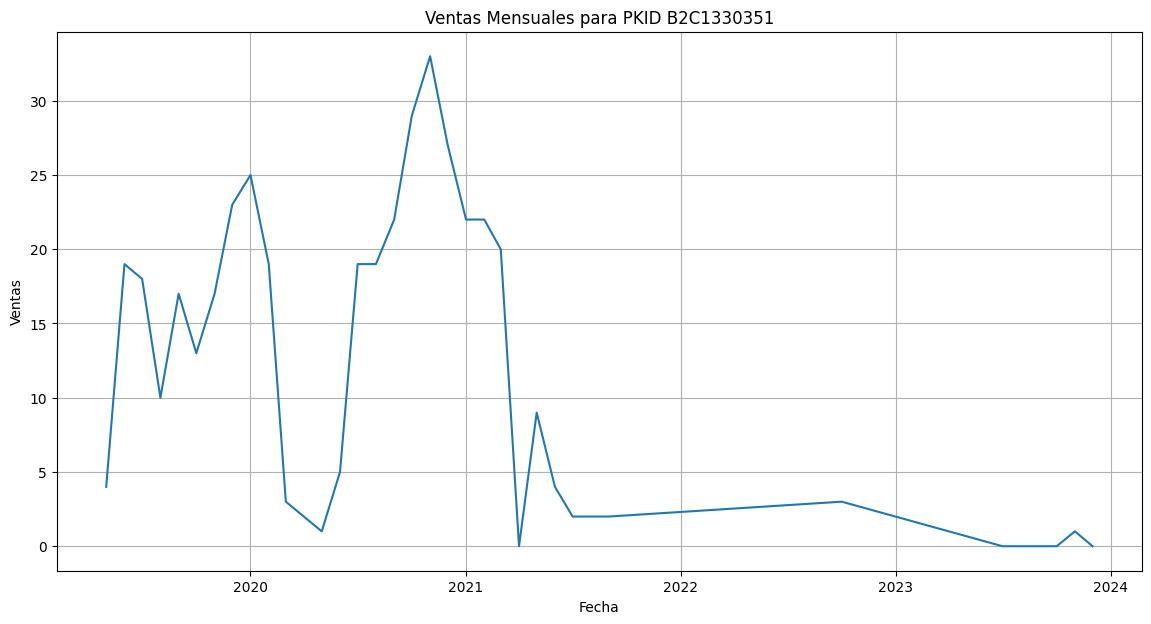

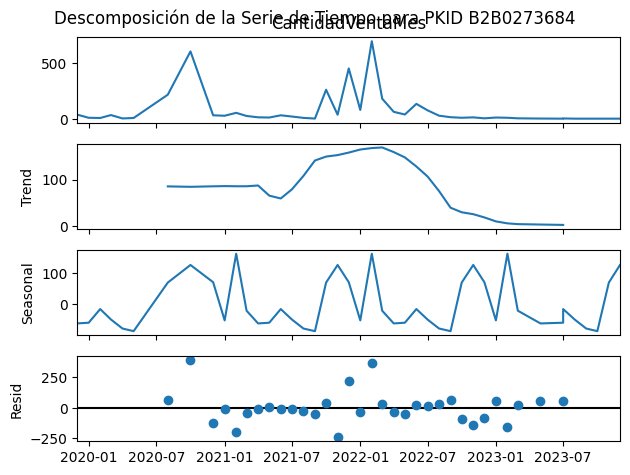

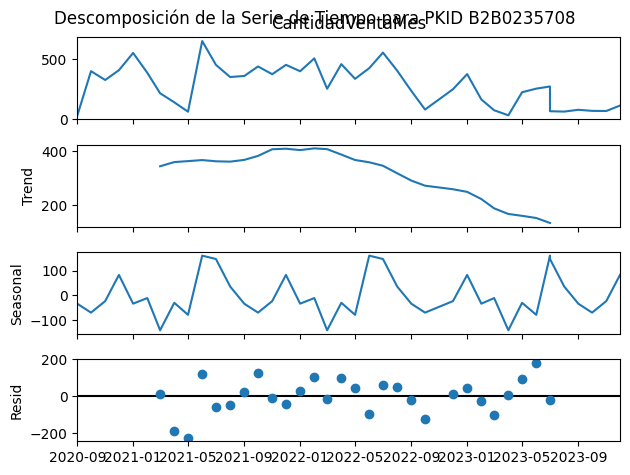

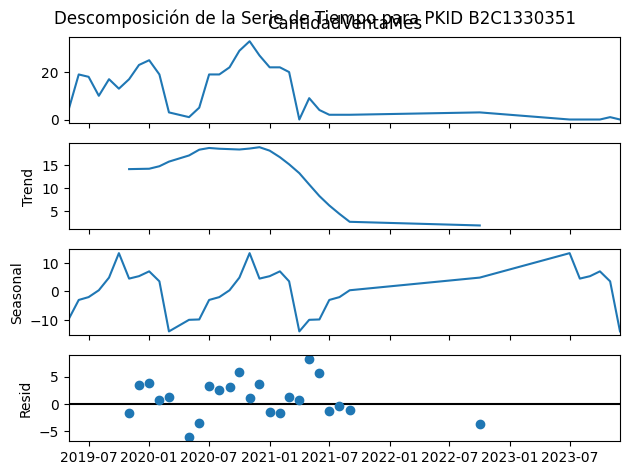

C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

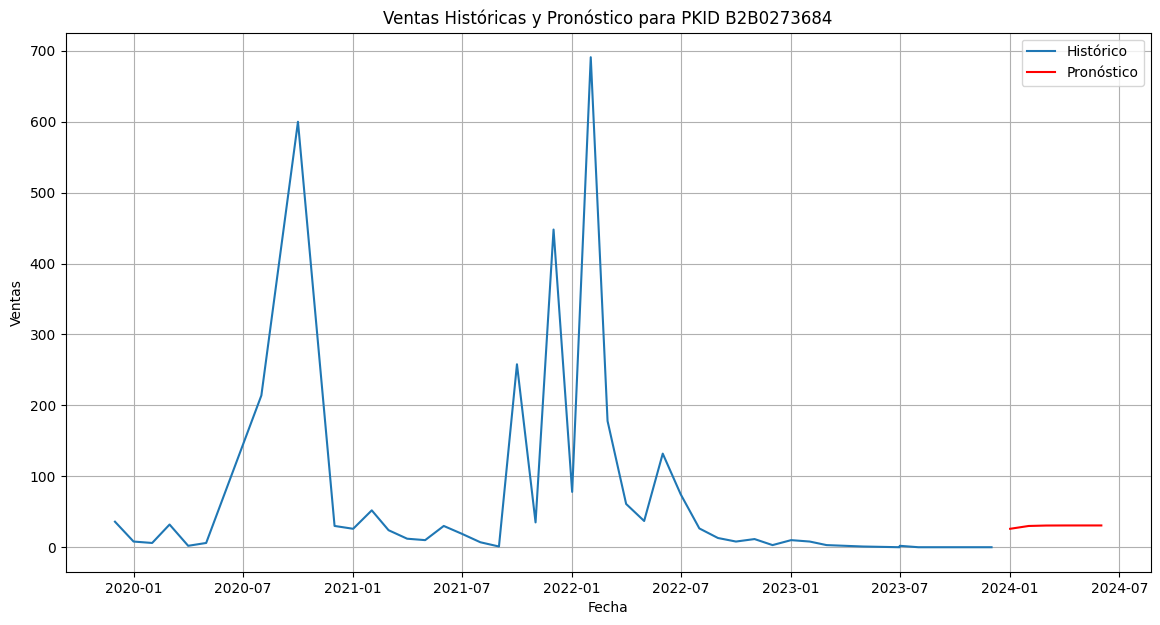

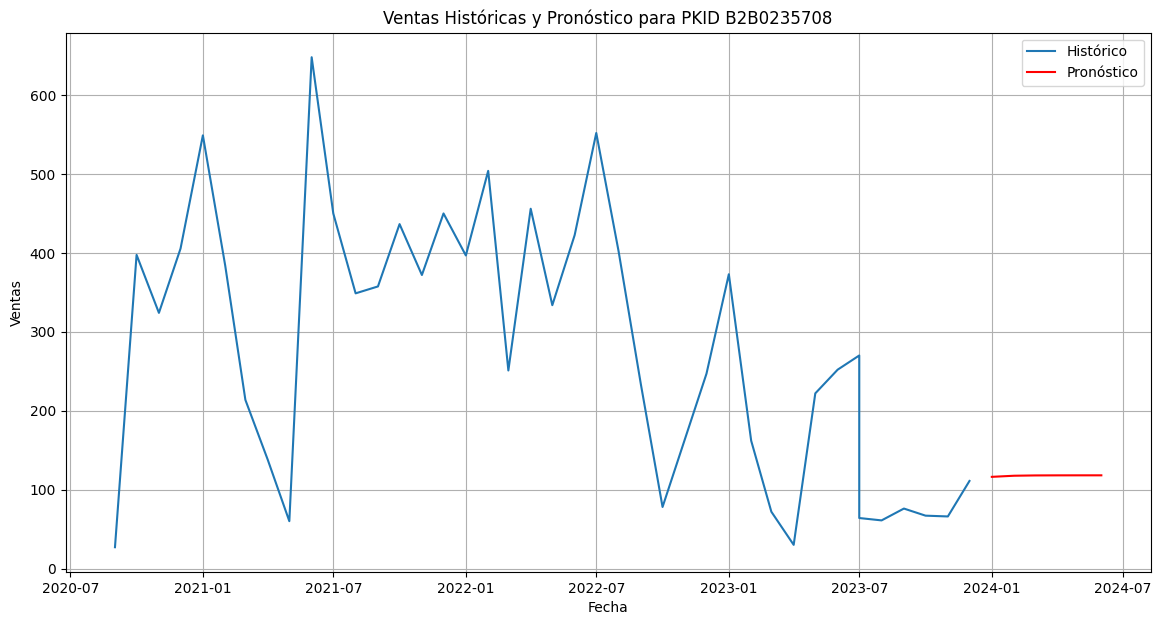

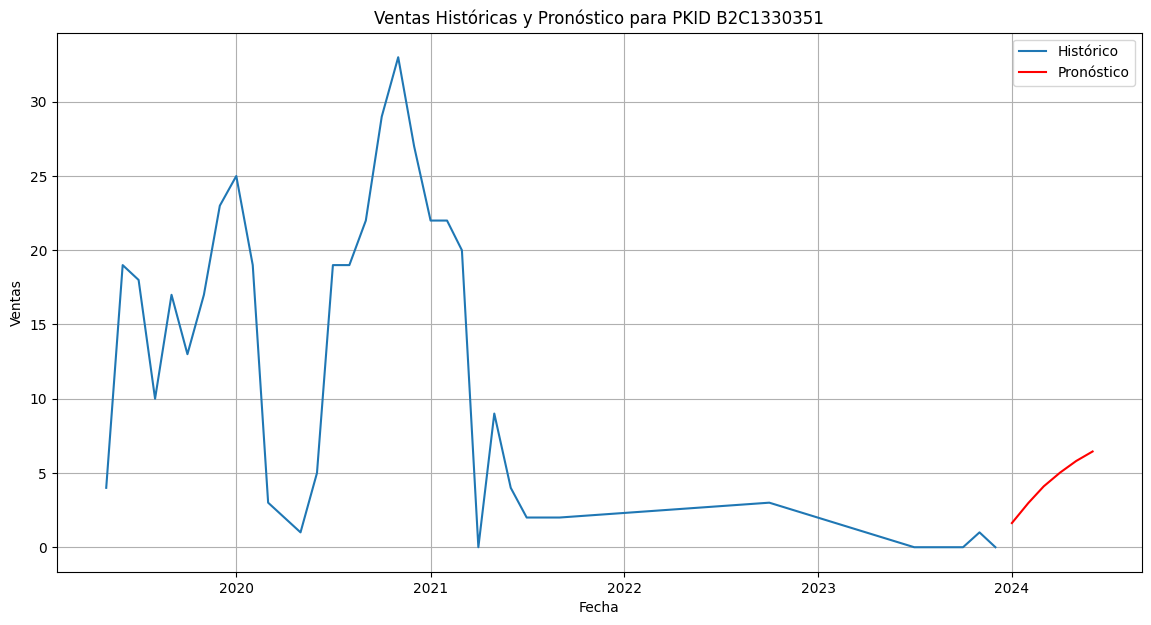

C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

PKID B2B0273684 - MSE: 23278.480542219666
PKID B2B0273684 - MAE: 93.54010646428561
PKID B2B0235708 - MSE: 21791.134970644405
PKID B2B0235708 - MAE: 111.28851593098163
PKID B2C1330351 - MSE: 43.61931045101933
PKID B2C1330351 - MAE: 4.869615681087619
Archivo ./Informe predictivo/pronóstico de ventas.xlsx guardado con éxito


In [4]:
try:
    # Establecer la conexión
    conn = pyodbc.connect(conn_str)

    # Consulta SQL para cargar datos
    sql_query = '''
    SELECT *
    FROM [Universal].[dbo].[PREDICTIVO]
    '''

    # Cargar datos en un DataFrame
    df = pd.read_sql(sql_query, conn)

    # Cerrar la conexión
    conn.close()

    # Paso 2: Análisis exploratorio inicial de los datos
    print(df.head())
    print(df.describe())

    # Filtrar PKID con al menos 24 observaciones
    pkids = df['PKID'].value_counts()[df['PKID'].value_counts() >= 24].index.tolist()
    selected_pkids = random.sample(pkids, 3)

    # Paso 3: Generar gráficos de las series de tiempo de 3 PKID
    for pkid in selected_pkids:
        df_pkid = df[df['PKID'] == pkid].copy()
        df_pkid.loc[:, 'Fecha'] = pd.to_datetime(df_pkid['AnioMes'], format='%Y-%m')
        df_pkid.set_index('Fecha', inplace=True)

        plt.figure(figsize=(14, 7))
        sns.lineplot(data=df_pkid, x=df_pkid.index, y='CantidadVentaMes')
        plt.title(f'Ventas Mensuales para PKID {pkid}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.grid(True)
        plt.show()

    # Paso 4: Descomposición de las series de tiempo en componentes de tendencia, estacionalidad y residuos
    for pkid in selected_pkids:
        df_pkid = df[df['PKID'] == pkid].copy()
        df_pkid.loc[:, 'Fecha'] = pd.to_datetime(df_pkid['AnioMes'], format='%Y-%m')
        df_pkid.set_index('Fecha', inplace=True)

        if len(df_pkid) >= 24:
            result = seasonal_decompose(df_pkid['CantidadVentaMes'], model='additive', period=12)
            result.plot()
            plt.suptitle(f'Descomposición de la Serie de Tiempo para PKID {pkid}')
            plt.show()
        else:
            print(f'PKID {pkid} no tiene suficientes datos para descomposición estacional')

    # Paso 5: Aplicar ARIMA para el pronóstico
    forecast_results = {}

    for pkid in selected_pkids:
        df_pkid = df[df['PKID'] == pkid].copy()
        df_pkid.loc[:, 'Fecha'] = pd.to_datetime(df_pkid['AnioMes'], format='%Y-%m')
        df_pkid.set_index('Fecha', inplace=True)

        if len(df_pkid) >= 24:
            model = ARIMA(df_pkid['CantidadVentaMes'], order=(1, 1, 1))
            fit_model = model.fit()
            forecast = fit_model.forecast(steps=6)

            forecast_dates = pd.date_range(start=df_pkid.index[-1] + pd.DateOffset(1), periods=6, freq='MS')
            forecast_df = pd.DataFrame({'Fecha': forecast_dates, 'Forecast': forecast})
            forecast_df.set_index('Fecha', inplace=True)

            forecast_results[pkid] = forecast_df
        else:
            print(f'PKID {pkid} no tiene suficientes datos para pronóstico')

    # Paso 6: Generar gráficos de ventas históricas junto con los pronósticos
    for pkid in selected_pkids:
        df_pkid = df[df['PKID'] == pkid].copy()
        df_pkid.loc[:, 'Fecha'] = pd.to_datetime(df_pkid['AnioMes'], format='%Y-%m')
        df_pkid.set_index('Fecha', inplace=True)

        if pkid in forecast_results:
            forecast_df = forecast_results[pkid]

            plt.figure(figsize=(14, 7))
            plt.plot(df_pkid.index, df_pkid['CantidadVentaMes'], label='Histórico')
            plt.plot(forecast_df.index, forecast_df['Forecast'], label='Pronóstico', color='red')
            plt.xlabel('Fecha')
            plt.ylabel('Ventas')
            plt.title(f'Ventas Históricas y Pronóstico para PKID {pkid}')
            plt.legend()
            plt.grid(True)
            plt.show()

    # Paso 7: Evaluar el rendimiento de los pronósticos
    for pkid in selected_pkids:
        df_pkid = df[df['PKID'] == pkid].copy()
        df_pkid.loc[:, 'Fecha'] = pd.to_datetime(df_pkid['AnioMes'], format='%Y-%m')
        df_pkid.set_index('Fecha', inplace=True)

        if len(df_pkid) >= 24:
            model = ARIMA(df_pkid['CantidadVentaMes'], order=(1, 1, 1))
            fit_model = model.fit()
            in_sample_forecast = fit_model.predict(start=0, end=len(df_pkid)-1)

            mse = mean_squared_error(df_pkid['CantidadVentaMes'], in_sample_forecast)
            mae = mean_absolute_error(df_pkid['CantidadVentaMes'], in_sample_forecast)

            print(f'PKID {pkid} - MSE: {mse}')
            print(f'PKID {pkid} - MAE: {mae}')
        else:
            print(f'PKID {pkid} no tiene suficientes datos para evaluar el rendimiento')

    # Paso 8: Guardar en Excel el resultado final de todos los pronósticos
    # Asegurarse de que 'Fecha' sea parte del índice y los datos estén alineados
    df['Fecha'] = pd.to_datetime(df['AnioMes'], format='%Y-%m')
    df.set_index('Fecha', inplace=True)

    # Unir los resultados del pronóstico con los datos originales
    for pkid, forecast_df in forecast_results.items():
        df = df.join(forecast_df, rsuffix=f'_{pkid}', how='outer')

    # Guardar en un archivo Excel en la ubicación deseada
    excel_file = './Informe predictivo/pronóstico de ventas.xlsx'  # Ajustar la ubicación según tu entorno
    df.to_excel(excel_file)

    print(f'Archivo {excel_file} guardado con éxito')

except pyodbc.Error as ex:
    print(f'Error de conexión: {ex}')
except Exception as e:
    print(f'Ocurrió un error: {e}')

# Estrategia:

Para implementar una estrategia analítica que permita pronosticar las ventas de todo el portafolio de Landers Universal, podemos seguir los siguientes pasos, explicados de manera más concreta y menos técnica:

### 1. **Comprender los Datos de Ventas**
- **Revisión de Datos:** Primero, necesitamos reunir y revisar los datos históricos de ventas para todos nuestros productos. Esto nos ayudará a entender las tendencias y patrones en nuestras ventas.
- **Segmentación de Productos:** Agrupar los productos en categorías o segmentos, facilitando el análisis por grupos similares y no individualmente.

### 2. **Formar un Equipo de Trabajo Sincronizado**
- **Equipo Multidisciplinario:** Crear un equipo compuesto por expertos en análisis de datos, ventas, marketing, y tecnología. La diversidad en el equipo asegurará que tengamos diferentes perspectivas y habilidades necesarias para el proyecto.
- **Metodologías Ágiles:** Implementar metodologías ágiles, como Scrum o Kanban, para gestionar el proyecto. Esto permitirá una colaboración efectiva y adaptabilidad a los cambios durante el proceso.

### 3. **Definir Objetivos Claros**
- **Objetivos de Pronóstico:** Establecer objetivos específicos para el pronóstico, como mejorar la precisión de las ventas mensuales o identificar productos con alta demanda futura.
- **Indicadores Clave de Rendimiento (KPIs):** Determinar los KPIs que utilizará el equipo para medir el éxito de los pronósticos, como la exactitud del pronóstico, el inventario optimizado, y la reducción de costos.

### 4. **Implementar Herramientas Analíticas**
- **Software y Tecnologías:** Utilizar herramientas de análisis de datos avanzadas como Python y SQL para manejar grandes volúmenes de datos y generar pronósticos precisos.
- **Modelos de Pronóstico:** Aplicar modelos estadísticos probados, como ARIMA, para descomponer las series de tiempo en componentes y predecir ventas futuras. Esto se puede hacer de forma automatizada para todo el portafolio de productos.

### 5. **Automatización del Proceso de Pronóstico**
- **Integración de Sistemas:** Integrar el sistema de pronóstico con los sistemas de gestión de inventarios y ventas actuales de Landers Universal. Esto permitirá que los datos se actualicen en tiempo real y los pronósticos se ajusten automáticamente.
- **Reportes Automáticos:** Configurar la generación de informes automáticos que resuman los pronósticos de ventas y destaquen cualquier cambio significativo en las tendencias de ventas.

### 6. **Monitoreo y Mejora Continua**
- **Revisiones Periódicas:** Realizar reuniones periódicas para revisar los resultados de los pronósticos y ajustar las estrategias según sea necesario.
- **Feedback Constante:** Fomentar un ambiente de feedback constante dentro del equipo y con otras partes interesadas para mejorar continuamente el proceso de pronóstico.

### Ejemplo Concreto
Por ejemplo, en nuestro análisis inicial, identificamos tres productos clave que analizamos más a fondo para ver patrones específicos. Los resultados nos dieron una visión clara de la estacionalidad y las tendencias. Al expandir esta metodología a todo el portafolio de productos, podemos prever mejor las necesidades de inventario y ajustar nuestras estrategias de marketing para aprovechar al máximo las oportunidades de ventas.

### Beneficios Esperados
- **Mejora en la Precisión de las Ventas:** Predicciones más precisas permitirán decisiones más informadas sobre producción y inventario.
- **Reducción de Costos:** Evitar sobreproducción o escasez de productos, optimizando los niveles de inventario.
- **Aumento de la Satisfacción del Cliente:** Asegurar que los productos estén disponibles cuando los clientes los necesiten.

Con este enfoque, Landers Universal puede establecer una base sólida para un proceso de pronóstico de ventas efectivo y adaptable, permitiendo a la empresa mantenerse competitiva y preparada para las demandas futuras.